In [6]:
import h5py
from src.helper.visualization import visualize_pointclouds_parts_partglot
import numpy as np
bsp_net_data_path = '/home/bellatini/DL3D-Practical/Baselines/BSP-NET-pytorch/data/data_per_category/03001627_seg_chair/03001627_seg256.hdf5'
bsp_net_data_path = '/home/bellatini/DL3D-Practical/Baselines/BSP-NET-pytorch/data/data_per_category/03001627_chair/03001627_vox256_img_test.hdf5'
cmap = [0xff0000, 0x00ff00, 0x0000ff, 0xff00ff, 0xffff00, 0x00ffff]

h5_data = h5py.File(bsp_net_data_path)


idx = 0 # 32, 500
resolutions = [16, 32, 64] 
res = resolutions[2]
verbose = True

print(list(h5_data.keys())) if verbose else None

if verbose:
    for r in resolutions:
        print(f"\nr={r}")
        print(h5_data['pixels']) if 'pixels' in list(h5_data.keys()) else None
        print(h5_data[f'points_{r}'])
        print(h5_data[f'values_{r}'])
        print(h5_data['voxels'])

pc = h5_data[f'points_{res}'][idx]

mask = h5_data[f'values_{res}'][idx].astype(bool)
print(f"mask.shape={mask.shape}") if verbose else None
print(f"mask={mask}") if verbose else None
mask = (np.ones((mask.shape[0], 3)) * mask).astype(bool)
print(f"mask.shape={mask.shape}") if verbose else None


pc[mask].reshape((-1, 3)).shape, pc.shape

segmented_pc = np.array([
    pc[mask].reshape((-1,3)), 
    pc[~mask].reshape((-1,3))
    ])

visualize_pointclouds_parts_partglot(segmented_pc, point_size=2, opacity=0.4, part_colors=cmap)


['pixels', 'points_16', 'points_32', 'points_64', 'values_16', 'values_32', 'values_64', 'voxels']

r=16
<HDF5 dataset "pixels": shape (1356, 24, 137, 137), type "|u1">
<HDF5 dataset "points_16": shape (1356, 4096, 3), type "|u1">
<HDF5 dataset "values_16": shape (1356, 4096, 1), type "|u1">
<HDF5 dataset "voxels": shape (1356, 64, 64, 64, 1), type "|u1">

r=32
<HDF5 dataset "pixels": shape (1356, 24, 137, 137), type "|u1">
<HDF5 dataset "points_32": shape (1356, 4096, 3), type "|u1">
<HDF5 dataset "values_32": shape (1356, 4096, 1), type "|u1">
<HDF5 dataset "voxels": shape (1356, 64, 64, 64, 1), type "|u1">

r=64
<HDF5 dataset "pixels": shape (1356, 24, 137, 137), type "|u1">
<HDF5 dataset "points_64": shape (1356, 16384, 3), type "|u1">
<HDF5 dataset "values_64": shape (1356, 16384, 1), type "|u1">
<HDF5 dataset "voxels": shape (1356, 64, 64, 64, 1), type "|u1">
mask.shape=(16384, 1)
mask=[[False]
 [False]
 [ True]
 ...
 [False]
 [False]
 [False]]
mask.shape=(16384, 3)
Visualization

/tmp/ipykernel_2029382/964842391.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  segmented_pc = np.array([


Output()

129.9510294596354

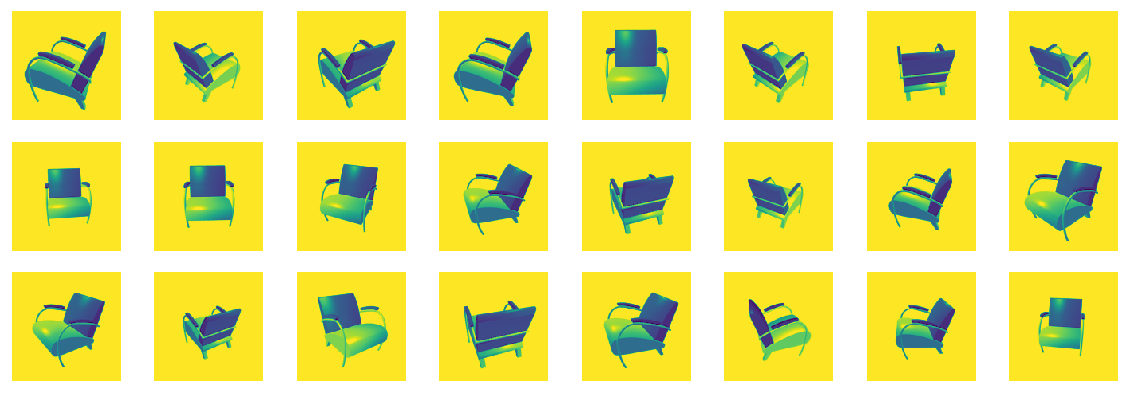

In [12]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

idx = 0
figure(figsize=(12, 4), dpi=120)

data = h5_data['pixels'][idx][:]
rows = 3
# plt.imshow(data, interpolation='nearest')
# plt.show()

for i, x in enumerate(data):
    plt.subplot(rows,int(len(data)/rows),i+1)
    # plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(x, interpolation='nearest')
    
plt.show()


/tmp/ipykernel_1408299/676992732.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


<Figure size 2640x880 with 0 Axes>

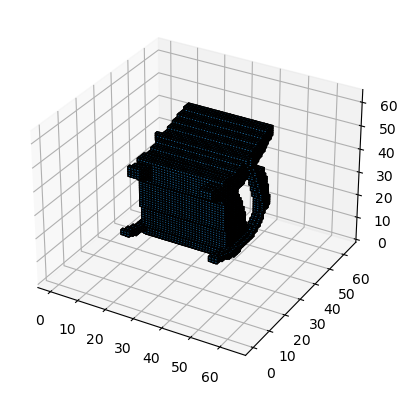

In [14]:
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

idx = 0
figure(figsize=(12, 4), dpi=220)

voxel_data = h5_data['voxels'][idx][:]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect('auto')

ax.voxels(voxel_data.reshape(64,64,64), edgecolor="k")

plt.show()
